# DBZ Power Level Project
This notebook is meant to be a fun experiment to build learning on the basics of machine learning.

## Load Data Set
Loading the data set which we received from Kaggle. Data needed to go through a couple of phases of preprocessing which can be seen in the Data Preprocessing section.

In [41]:
import pandas as pd
df = pd.read_csv ("Data/Dragon_Ball_Data_Set.csv")
df

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
0,Goku,10,Emperor Pilaf Saga,Dragon Ball
1,Bulma,1.5,Emperor Pilaf Saga,Dragon Ball
2,Bear Thief,7,Emperor Pilaf Saga,Dragon Ball
3,Master Roshi,30,Emperor Pilaf Saga,Dragon Ball
4,Oolong,5,Emperor Pilaf Saga,Dragon Ball
...,...,...,...,...
1239,Goku (MSSJ with SSJG's power),"22,400,000,000,000",Movie 14: Battle of Gods,Dragon Ball Z
1240,Goku (SSJG),"224,000,000,000,000",Movie 14: Battle of Gods,Dragon Ball Z
1241,Goku,"44,800,000,000",Movie 14: Battle of Gods,Dragon Ball Z
1242,"Beerus (full power, never shown)","896,000,000,000,000",Movie 14: Battle of Gods,Dragon Ball Z


## Data Preprocessing 
Implementing a form of data preprocessing to remove anomalies of character power levels within the dataset.

In [42]:
df = df [~df["Power_Level"].str.contains("(supressed figting Trunks)")]

/var/folders/16/4nzt98916c34lwlbh3f81k2r0000gn/T/ipykernel_75257/3435884438.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df [~df["Power_Level"].str.contains("(supressed figting Trunks)")]


Some values in the data had different syntaxs. For example, one power level was noted as "85" while another was noted as "820,000". I decided to remove all the commas from the values to fix the "ValueError".

In [43]:
df ["Power_Level"] = df ["Power_Level"].str.replace(",","") #removing commas from power level dataset
df ["Power_Level"] = pd.to_numeric(df ["Power_Level"],errors="coerce") #method to convert power level column to numeric values

Noticed that single digit power levels were not being converted to numeric values correctly. I will now aim to fix this in the preprocessing section

In [44]:
def convert_to_numeric(value):
    try: 
        return float(value)
    except ValueError:
        if value.isdigit(): #If it is a number in string format
            return float(value)
        else:
            return None
        
df ["Power_Level"] = df ["Power_Level"].apply(convert_to_numeric)

## Data Analysis

In [45]:
summary = df.describe()
#saga_power_levels = df.groupby("Saga_or_Movie")["Power_Level"].mean()
#character_power_levels_per_saga = df.groupby("Character")["Power_Level"].mean


- df.describe was used to generate descriptive statistics for the data frame. Good practice to store value in summary variable for when conducting exploratory analysis.
- The "groupby" method was used to split the data into different groups, "Saga" and "Character"

# Data Visualisation 
Will now attempt to visualise the data using matplotlib and seaborn

<function matplotlib.pyplot.show(close=None, block=None)>

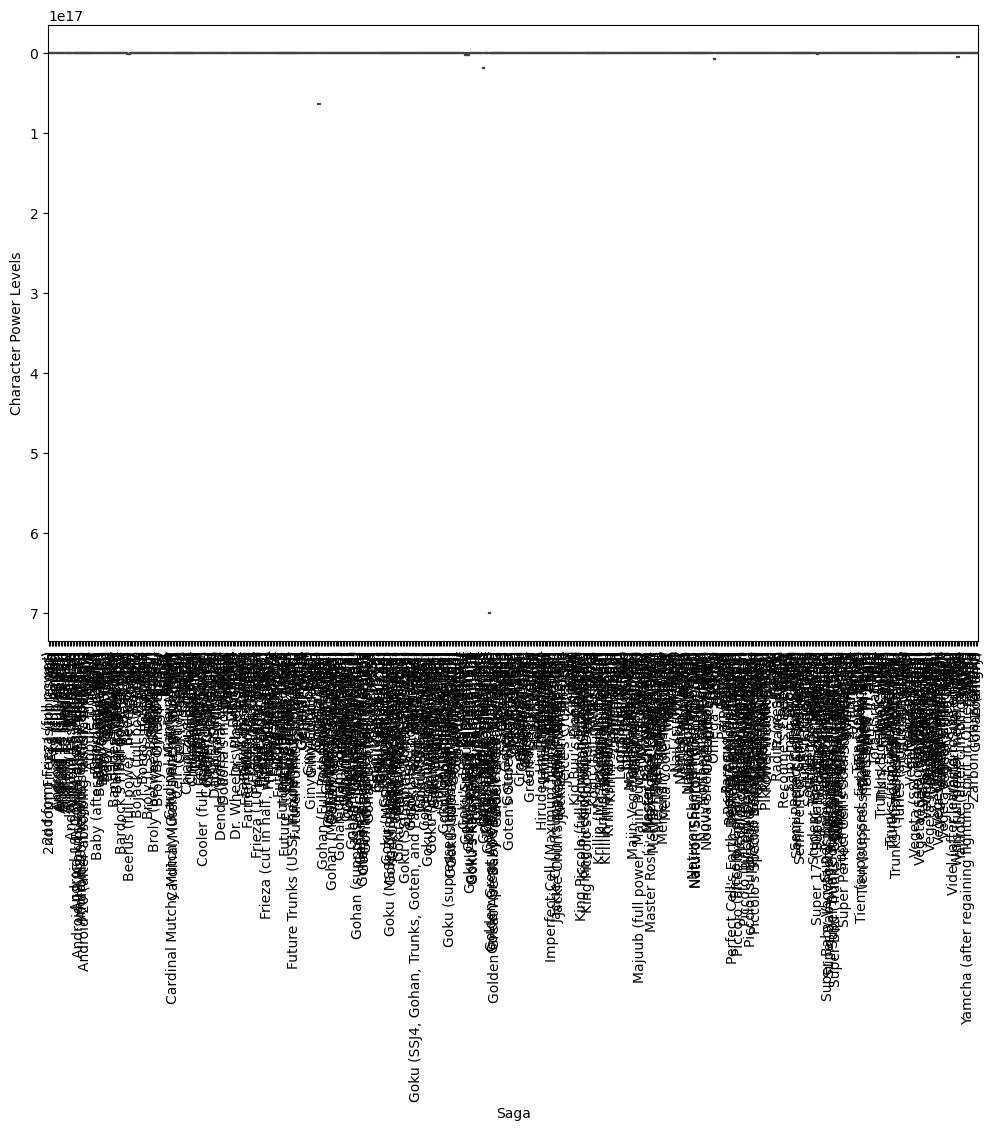

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

character_power_levels_per_saga = character_power_levels_per_saga.apply(np.mean)

power_levels_df = pd.DataFrame({
    "Saga" : character_power_levels_per_saga.index,
    "Character Power Levels" : character_power_levels_per_saga.values
})

power_levels_df["Character Power Levels"] = power_levels_df ["Character Power Levels"].apply(lambda x: [float(values) for values in x]
if isinstance(x, list) else float(x)
)

plt.figure(figsize = (12,8)) #set figure size
ax = sns.boxplot( x = "Saga", y = "Character Power Levels", data = power_levels_df) #create box plot
ax.invert_yaxis()
plt.xlabel = "Saga"
plt.ylabel = " Character Power Levels"
plt.title = "Distribution of Character Power Levels per Saga"
plt.xticks(rotation=90)
plt.show



In [ ]:
#print(len(saga_power_levels.index))
#print(len(saga_power_levels.values))

print(character_power_levels_per_saga.index)
print(character_power_levels_per_saga.values)






Index(['2nd form Frieza (full power)', '2nd form Frieza (suppressed)', 'Abo',
       'Aka', 'Aka (full power)', 'Amond', 'Androd 15 (supressed)',
       'Android 13 (full power)', 'Android 14 (full power)',
       'Android 14 (supressed)',
       ...
       'Yakkon', 'Yakon', 'Yamcha',
       'Yamcha (after regaining fighting spirit in Other World)', 'Yamu',
       'Zangya', 'Zarbon', 'Zarbon (transformed)', 'Zoonama',
       ' Gohan (angry)'],
      dtype='object', name='Character', length=623)
[list([1060000.0]) list([750000.0]) list([120000000.0])
 list([24000000000.0]) list([48000000.0]) list([40000.0])
 list([28000000.0]) list([620000000.0]) list([570000000.0])
 list([27000000.0]) list([580000000.0]) list([3000000000.0, 3000000000.0])
 list([2250000000.0])
 list([5000000000.0, 7000000000.0, 150000000000.0, 5000000000.0])
 list([10000000000.0]) list([4500000000.0])
 list([5000000000.0, 8000000000.0, 120000000000.0, 120000000000.0, 8000000000.0, 5000000000.0, nan, 8000000000.0, 8000